# Random Forest Regression

## Importing the libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

## Importing the dataset

In [5]:
df = pd.read_csv('/content/weather.csv')

In [6]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [7]:
df.head()

,PRCP,TMAX,Year,Month,Day
0,0.01,81,2010,8,1
1,0.04,82,2010,8,2
2,0.00,84,2010,8,3
3,0.00,93,2010,8,4
4,1.03,95,2010,8,5


In [16]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, 0].values

In [18]:
print(X.shape, y.shape) 

(3806, 4) (3806,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3044, 4) (762, 4) (3044,) (762,)


## Training the Random Forest Regression model on the whole dataset

In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## Predicting a new result

In [22]:
yhat = regressor.predict(X_test)

## Visualising the Random Forest Regression results

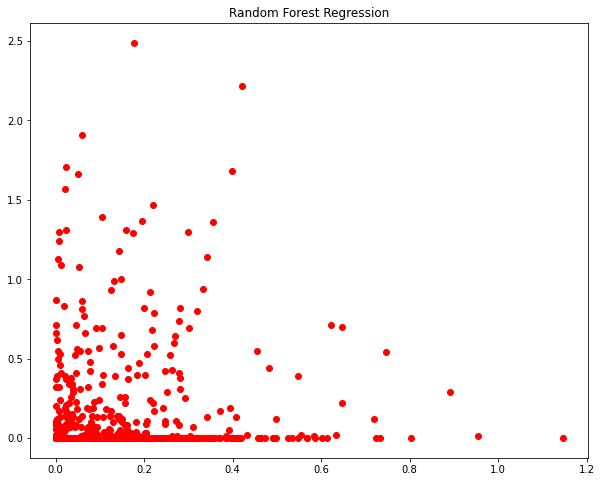

In [70]:
plt.scatter(yhat, y_test, color = 'red')
plt.title('Random Forest Regression')
plt.gcf().set_size_inches(10,8)
plt.show()

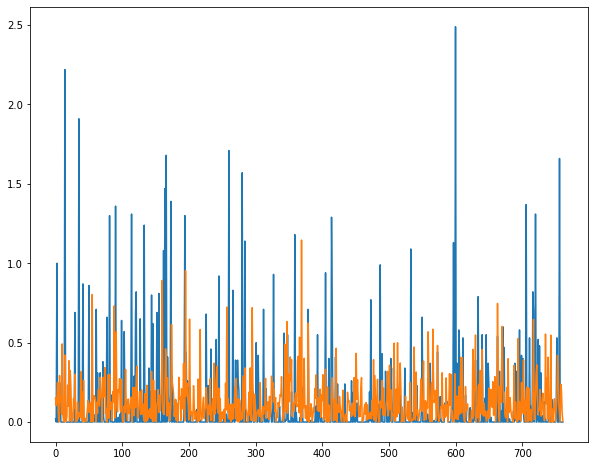

In [69]:
plt.plot(y_test)
plt.plot(yhat)
plt.gcf().set_size_inches(10,8)
plt.show()

**EVALUATION**

In [33]:
# Print results to evaluate model
print("Showing Performance Metrics for Decision Tree Classifier\n")

print ("Training Accuracy: {}".format(regressor.score(X_train, y_train)))
predicted = regressor.predict(X_test)

print("\n")

print("Cross Validation Accuracy: \n")
cv_accuracy = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10)
print("Accuracy using 10 folds: ")
print(cv_accuracy)

print("\n")

print("Mean accuracy: {}".format(cv_accuracy.mean()))
print("Standard Deviation: {}".format(cv_accuracy.std()))

Showing Performance Metrics for Decision Tree Classifier

Training Accuracy: 0.7691832986056987


Cross Validation Accuracy: 

Accuracy using 10 folds: 
[-0.16662681 -0.30401929 -0.19074717 -0.79427364 -0.30822823 -0.07693231
 -0.27769748 -0.13467502 -0.24715326 -0.42898849]


Mean accuracy: -0.29293417070032524
Standard Deviation: 0.19251892818134078


**TEMPERATURE**

In [57]:
Xt = df.iloc[:, 2:5].values
yt = df.iloc[:, 1].values

In [58]:
print(Xt.shape, yt.shape) 

(3806, 3) (3806,)


In [59]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size=0.2)

In [60]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(Xt_train, yt_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [61]:
tpred = regressor.predict(Xt_test)

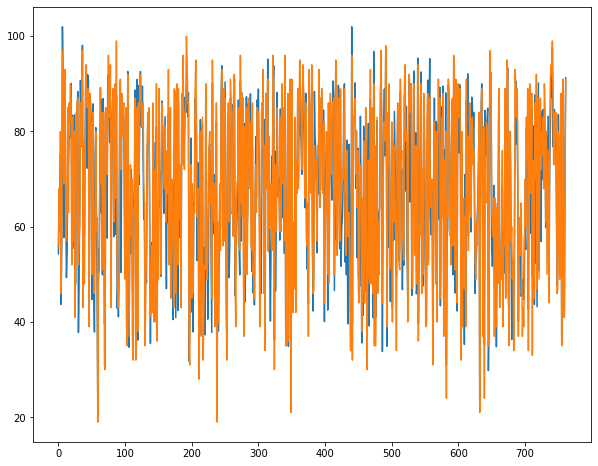

In [71]:
plt.plot(tpred)
plt.plot(yt_test)
plt.gcf().set_size_inches(10,8)
plt.show()

In [72]:
# Print results to evaluate model
print("Showing Performance Metrics for Random Forest Regression")

print ("Training Accuracy: {}".format(regressor.score(Xt_train, yt_train)))
predicted = regressor.predict(Xt_test)

print("\n")

print("Cross Validation Accuracy: \n")
cv_accuracy = cross_val_score(estimator=regressor, X=Xt_train, y=yt_train, cv=10)
print("Accuracy using 10 folds: ")
print(cv_accuracy)

print("\n")

print("Mean accuracy: {}".format(cv_accuracy.mean()))
print("Standard Deviation: {}".format(cv_accuracy.std()))

Showing Performance Metrics for Random Forest Regression
Training Accuracy: 0.9691433788776964


Cross Validation Accuracy: 

Accuracy using 10 folds: 
[0.77649173 0.79481361 0.79835726 0.81862582 0.82112453 0.80757539
 0.81069335 0.79970244 0.8097983  0.79930061]


Mean accuracy: 0.803648303210978
Standard Deviation: 0.012290730327135005
